In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ocean = pd.read_csv("Data_Level5_BAH_OceanCleanup.csv")

for i in range(0,len(ocean)):
    if ocean.at[i,'State'] == "United States":
        ocean.at[i,'State'] = "California, USA"

ocean = ocean[ocean.State != "Ontario, Canada"]
items_df = ocean[ocean.columns[14:-1]][:-1]

/home/mids/m207026/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
items_df

,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),...,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,0,0,0,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37898,1549,283,38,73,742,206,137,384,111,100,...,0,0,12,1,9,5,0,816,118,3172
37899,196,68,17,6,219,57,55,103,22,15,...,0,0,2,2,2,4,0,194,35,652
37900,1000,250,20,10,300,50,65,185,35,20,...,0,0,26,2,0,4,0,80,12,60
37901,455,111,21,25,495,87,89,216,69,124,...,0,0,15,6,5,23,0,141,25,1171


In [17]:
sorted(zip(items_df.columns,items_df.sum(0)),key=lambda x:x[1],reverse=True)[:10]

[('Cigarette Butts', 3315327),
 ('Foam Pieces', 3292277),
 ('Plastic Pieces', 2993101),
 ('Food Wrappers (candy, chips, etc.)', 1254419),
 ('Bottle Caps (Plastic)', 1102879),
 ('Beverage Bottles (Plastic)', 812395),
 ('Glass Pieces', 542969),
 ('Straws, Stirrers', 527566),
 ('Beverage Cans', 499752),
 ('Beverage Bottles (Glass)', 375777)]

In [202]:
stateStats = dict()
typeStats = dict()
#[pounds,miles,people,activities,children]

for index, row in ocean.iterrows():
    state = str(row['State'])
    cType = row['Cleanup Type']
    
    if state not in stateStats.keys():
        stateStats[state] = [0,0,0,0,0]
        
    stateStats[state][0] += row['Pounds']
    stateStats[state][1] += row['Miles']
    stateStats[state][2] += row['People']
    stateStats[state][3] += 1
    stateStats[state][4] += row['Children']

    if cType not in typeStats.keys():
        typeStats[cType] = [0,0,0,0,0]
        
    typeStats[cType][0] += row['Pounds']
    typeStats[cType][1] += row['Miles']
    typeStats[cType][2] += row['People']
    typeStats[cType][3] += 1
    typeStats[cType][4] += row['Children']
    
del stateStats['nan']
del typeStats[np.NaN]

In [203]:
stateStats_sorted = sorted(stateStats.items())
typeStats_sorted = sorted(typeStats.items())

In [204]:
states = list()
pounds = list()
miles = list()
people = list()
activities = list()
ppp = list()
ppm = list()
ppa = list()
children = list()

for key,value in stateStats_sorted:
    states.append(key)
    pounds.append(value[0])
    miles.append(value[1])
    people.append(value[2])
    ppp.append(value[0]/value[2])
    ppm.append(value[0]/value[1])
    ppa.append(value[0]/value[3])
    activities.append(value[3])
    children.append(value[4])

In [205]:
pcDict = {'State':states,'Pounds':pounds,'Miles':miles,'People':people,'Activities':activities,'PPP':ppp,'PPM':ppm,'PPA':ppa,'Children':children}

df = pd.DataFrame(pcDict,columns=['State','Pounds','People','Activities','PPP','PPM','PPA','Children'])

In [206]:
df

,State,Pounds,People,Activities,PPP,PPM,PPA,Children
0,"Alabama, USA",8.980525e+04,11279.0,197,7.962164,120.540012,455.864213,3037.0
1,"Alaska, USA",7.491390e+03,1532.0,163,4.889941,29.216815,45.959448,715.0
2,"Arizona, USA",4.715781e+05,3167.0,88,148.903712,7897.978930,5358.841529,495.0
3,"Arkansas, USA",2.164500e+03,208.0,4,10.406250,29.650685,541.125000,32.0
4,"California, USA",2.448678e+06,222591.0,9334,11.000797,184.652332,262.339664,15444.0
5,"Colorado, USA",9.971965e+04,8213.0,132,12.141684,443.089149,755.451894,1848.0
6,"Connecticut, USA",5.807116e+04,7138.0,407,8.135495,113.657561,142.680983,1737.0
7,"Delaware, USA",2.188025e+04,3890.0,331,5.624743,60.791509,66.103474,1084.0
8,"District of Columbia, USA",1.874299e+04,2891.0,371,6.483222,127.719445,50.520201,97.0
9,"Florida, USA",1.095684e+06,95832.0,11319,11.433383,79.339792,96.800416,14294.0


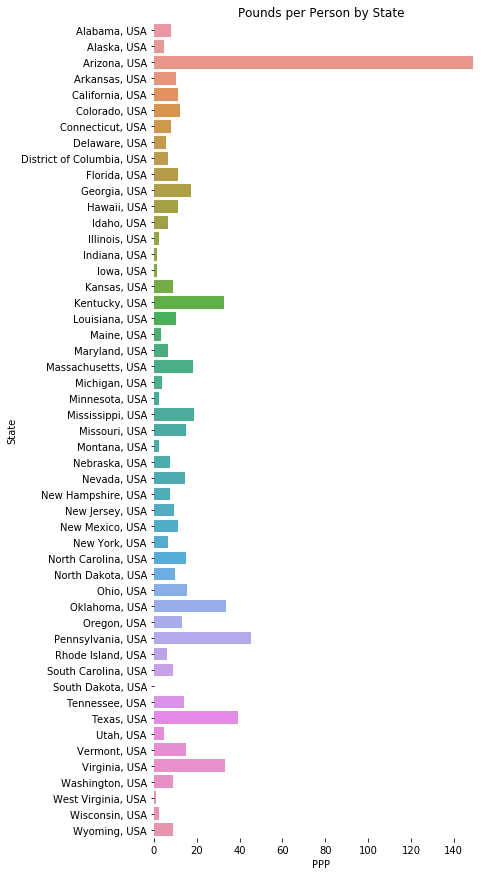

In [13]:
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.barplot(y='State',x='PPP',data=df[['State','PPP']])
ax.set(title='Pounds per Person by State')
sns.despine(left=True, bottom=True)

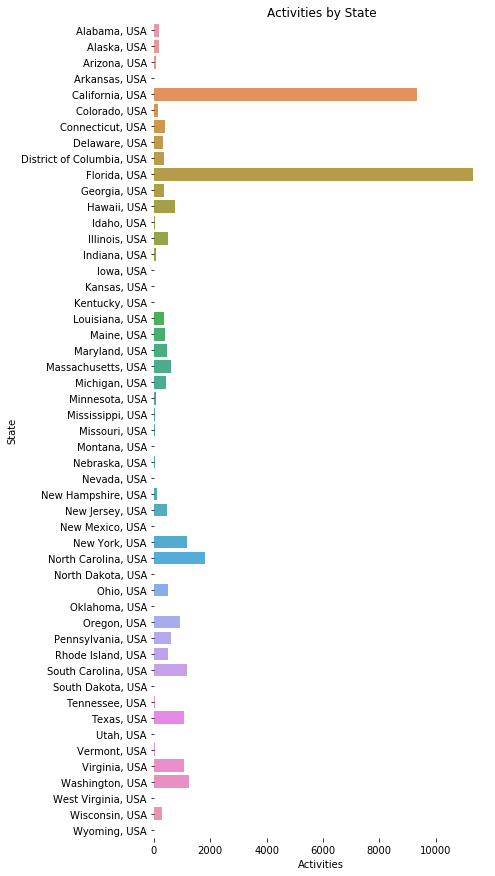

In [14]:
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.barplot(y='State',x='Activities',data=df[['State','Activities']])
ax.set(title='Activities by State')
sns.despine(left=True, bottom=True)

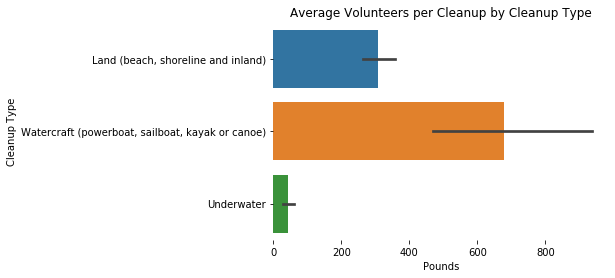

In [15]:
ax = sns.barplot(x='Pounds',y='Cleanup Type',data=ocean[['Cleanup Type','Pounds']])
ax.set(title='Average Volunteers per Cleanup by Cleanup Type')
sns.despine(left=True, bottom=True)

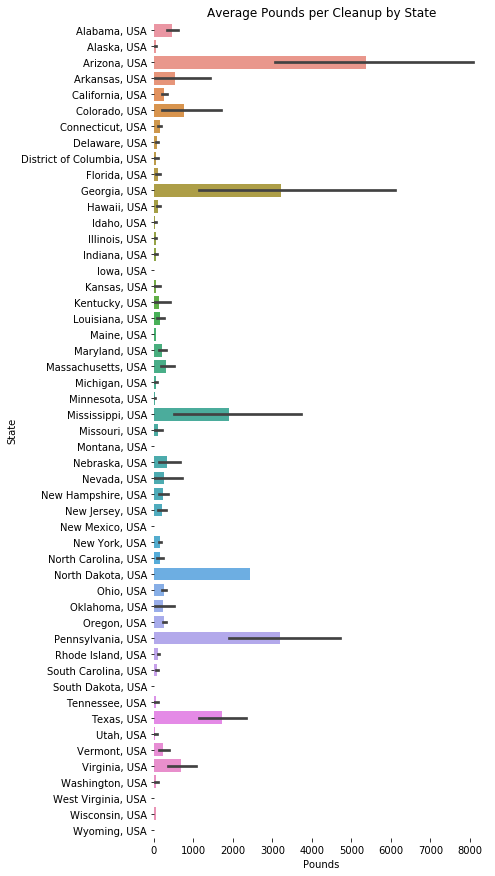

In [16]:
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.barplot(x='Pounds',y='State',data=ocean[['State','Pounds']],order=states)
ax.set(title='Average Pounds per Cleanup by State')
sns.despine(left=True, bottom=True)

In [101]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
transformed = svd.fit_transform(items_df)

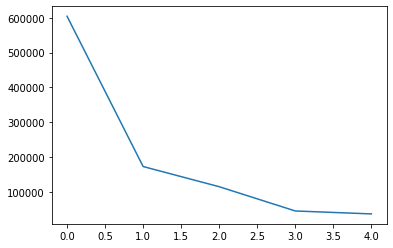

In [102]:
plt.plot(svd.singular_values_)

In [29]:
svd.singular_values_

array([604520.9167107 , 172516.43598867, 114514.8410608 ,  44779.06625281,
        36319.82056602,  27315.94007187,  22667.37421415,  20548.57865982,
        14336.69486972,  13853.38638171,  12080.25084855,  11687.07468219,
        10685.49813332,   9669.25630082,   7750.79976195,   6736.28696606,
         6073.53731352,   5496.60054175,   5419.64803737,   5152.54499511,
         4729.43536426,   4372.08734818,   4050.06790959,   3785.00845738,
         3698.10506694,   3525.18612906,   2985.40468519,   2774.60320648,
         2684.53895605,   2550.25957181,   2405.55997836,   2021.74251183,
         1927.43076779,   1782.20806562,   1743.20881625,   1626.41323129,
         1509.20949629,   1242.36363861,   1175.9981798 ,   1147.82713993])

In [39]:
from sklearn.cluster import MiniBatchKMeans

n = 15

km = MiniBatchKMeans(n).fit(items_df)

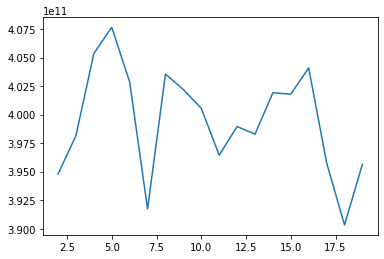

In [109]:
mini = float('inf')
bestCluster = None

ks = range(2,20)
inertias = []

for n in ks:
    km = MiniBatchKMeans(n).fit(transformed)
    inertias.append(km.inertia_)
    if km.inertia_ < mini:
        mini = km.inertia_
        bestCluster = km
        
plt.plot(ks,inertias)

In [76]:
len(km.cluster_centers_)

19

In [98]:
saved = bestCluster

In [125]:
len(bestCluster.cluster_centers_)

18

In [112]:
clustersize = []
for cluster in range(18):
    clustersize.append(sum(bestCluster.labels_==cluster))
clustersize

[5450,
 5528,
 467,
 2799,
 411,
 140,
 2180,
 3737,
 624,
 706,
 2181,
 675,
 793,
 1237,
 2160,
 7315,
 499,
 999]

In [124]:
km.labels_
bestCluster.inertia_

390330341617.2416

In [189]:
clustersize = []
for cluster in range(7):
    clustersize.append(sum(saved.labels_==cluster))
clustersize

[3006, 33952, 17, 353, 138, 255, 180]

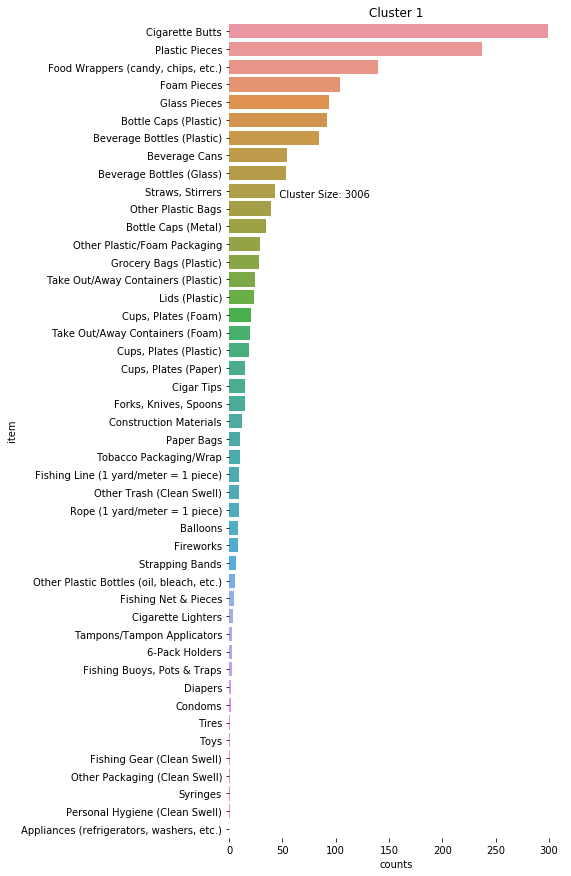

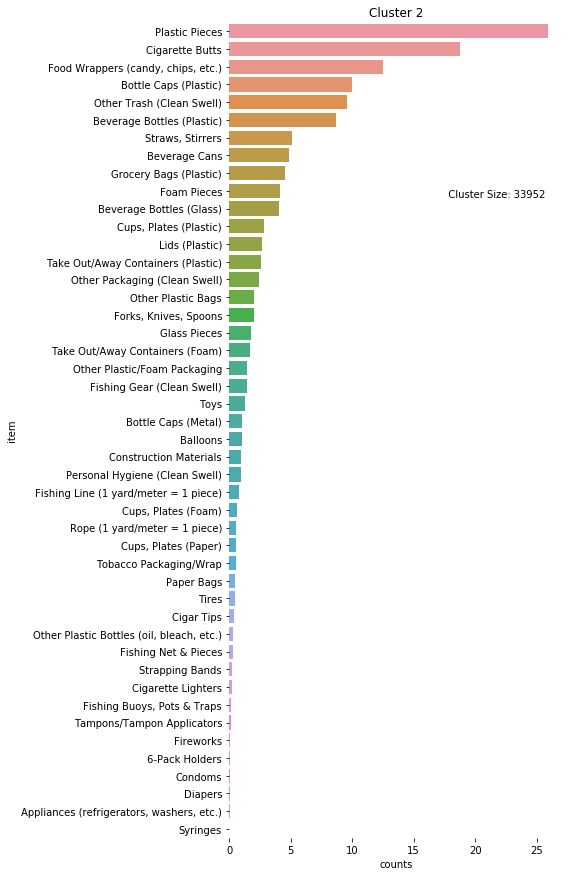

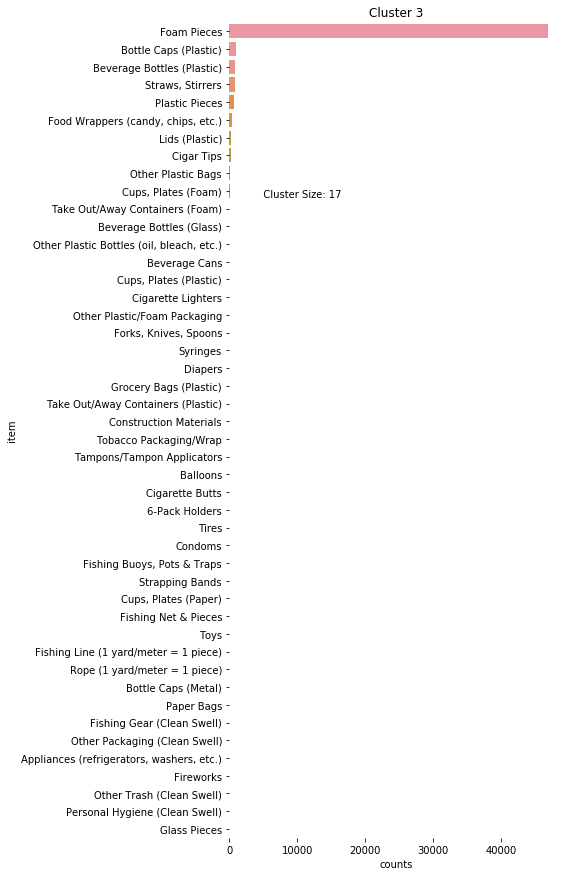

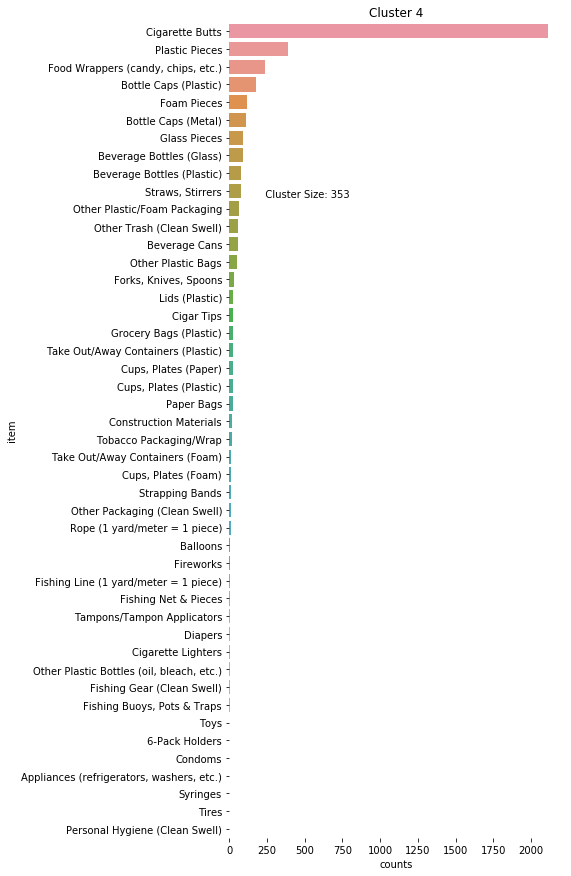

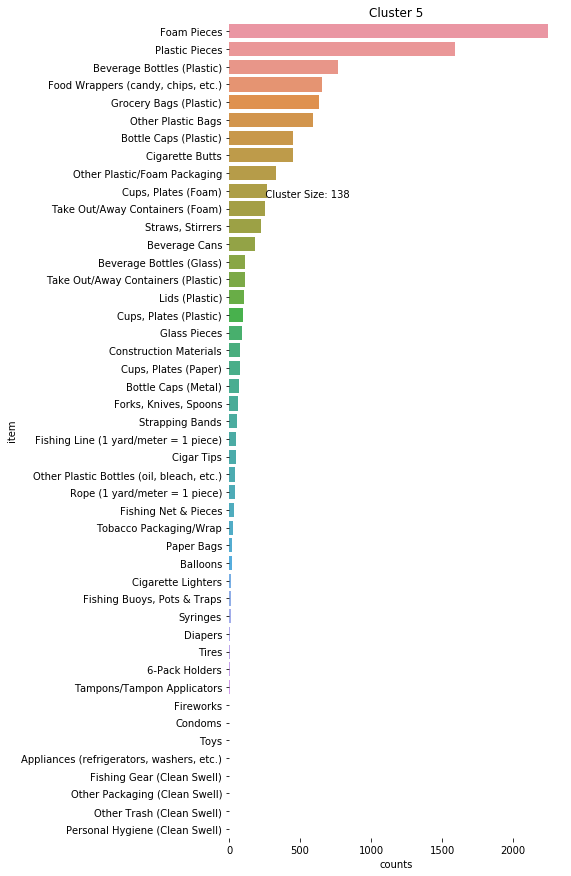

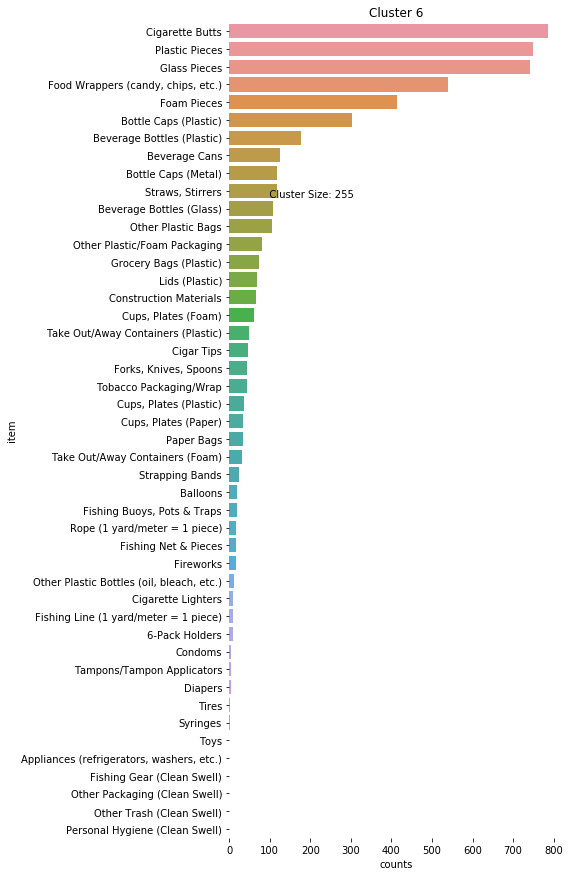

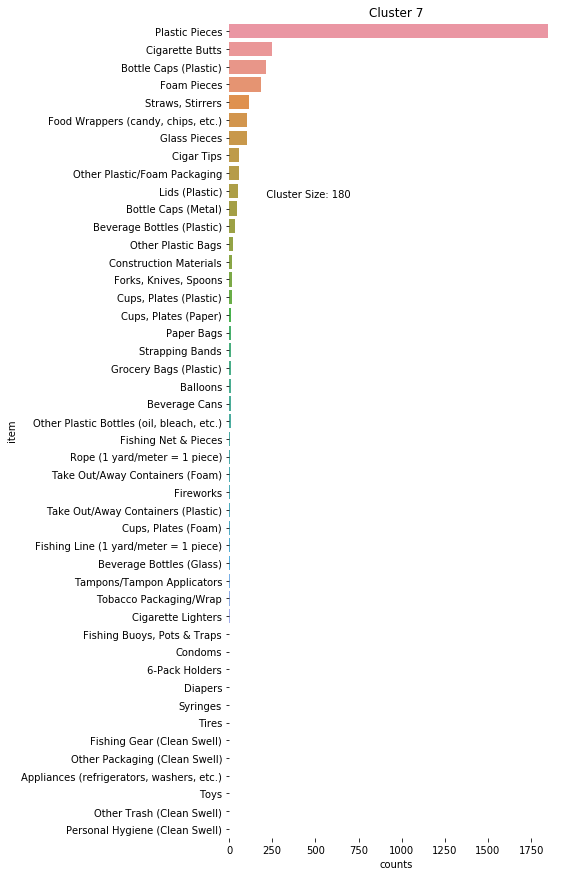

In [201]:
for n in range(7):
    pcDict = {'item':ocean.columns[14:-1],'counts':saved.cluster_centers_[n,:]}
    df = pd.DataFrame(pcDict,columns=['item','counts'])
#     large = df['counts'] > 5
#     df = df[large]

    tups = zip(ocean.columns[14:-1],saved.cluster_centers_[n,:])
    order = []
    for s,p in sorted(tups,key=lambda x:x[1],reverse=True):
        order.append(s)

    f, ax = plt.subplots(figsize=(6, 15))
    ax = sns.barplot(x='counts',y='item',data=df,order=order)
    ax.set(title='Cluster {0}'.format(n+1))
    ax.text(15, 10,"           Cluster Size: {0}\n".format(clustersize[n]))
    sns.despine(left=True, bottom=True)
    
# plt.figure(figsize=(16,16))
# plt.barh(ocean.columns[14:-1],bestCluster.cluster_centers_[0,:],order=order)
# plt.gca().invert_yaxis()

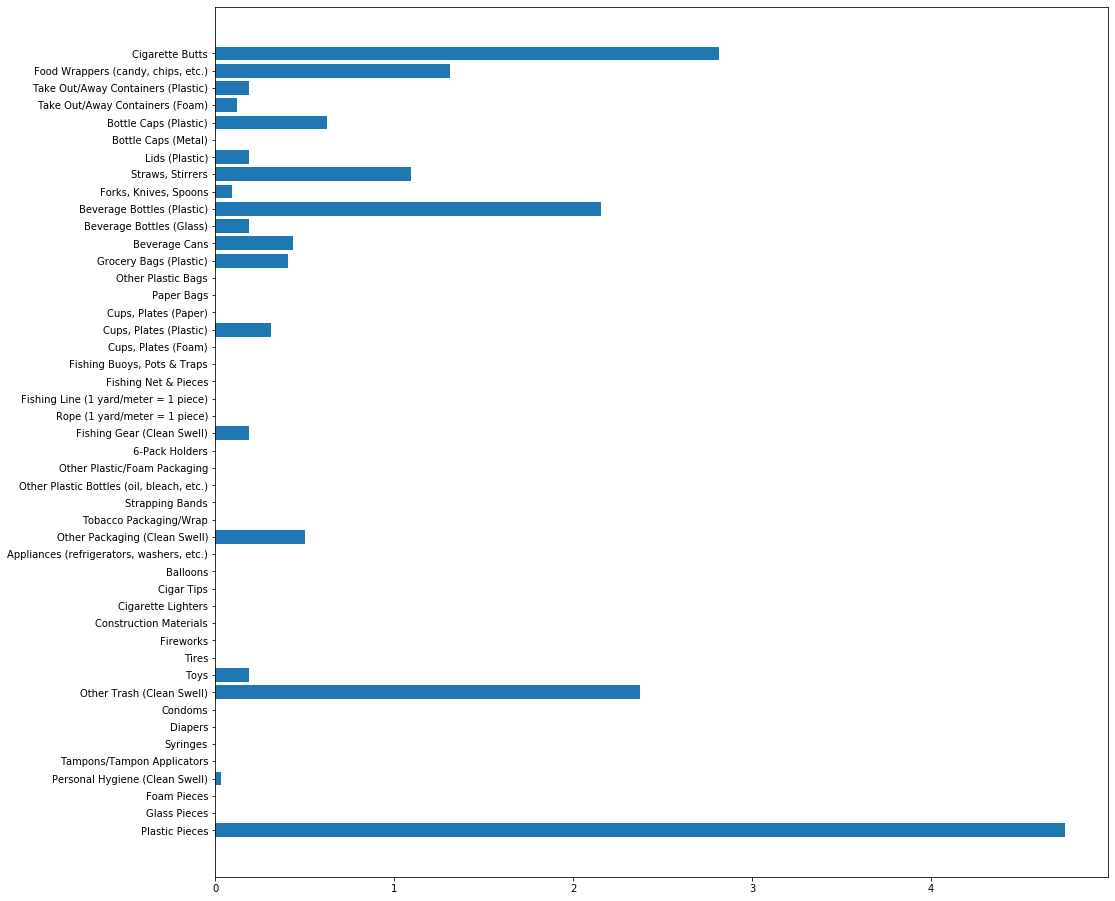

In [60]:
plt.figure(figsize=(16,16))
plt.barh(ocean.columns[14:-1],km.cluster_centers_[1,:])
plt.gca().invert_yaxis()

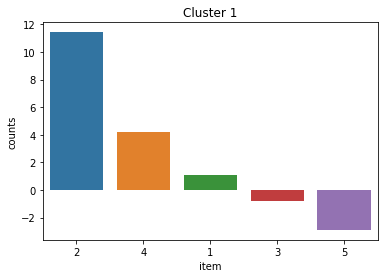

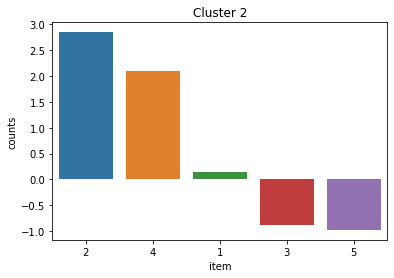

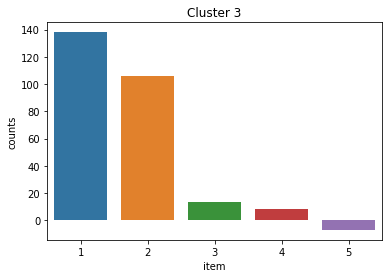

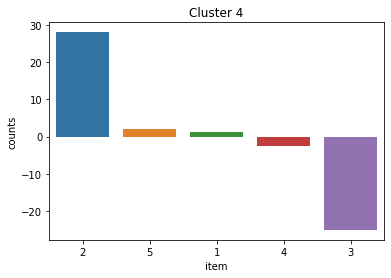

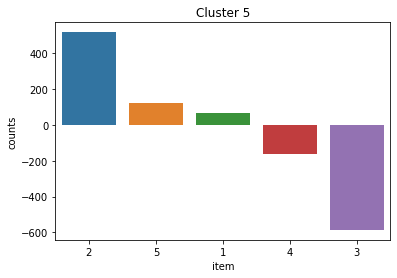

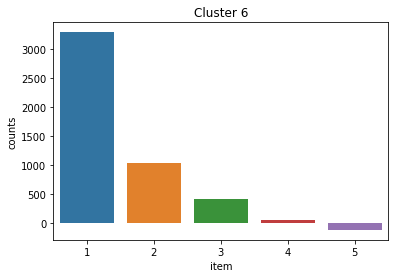

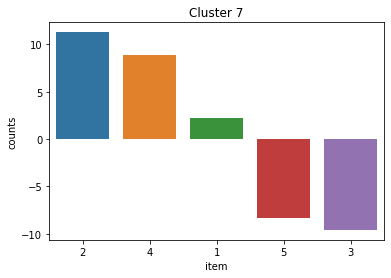

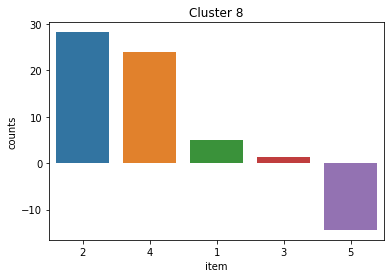

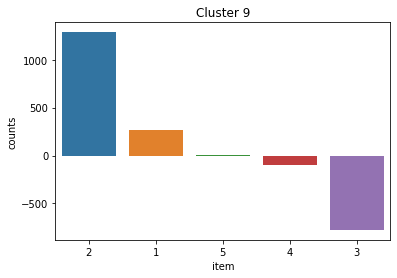

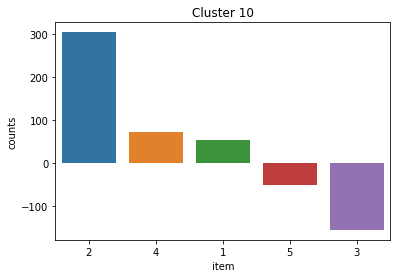

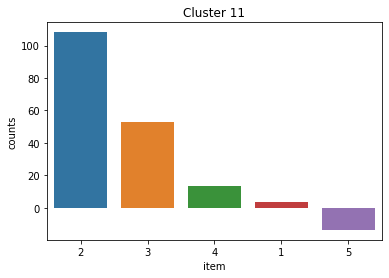

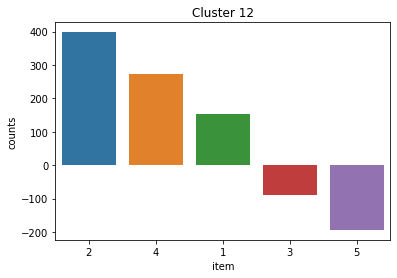

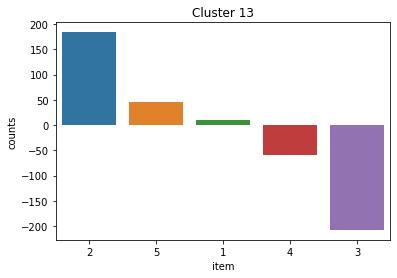

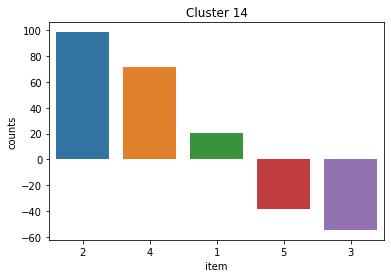

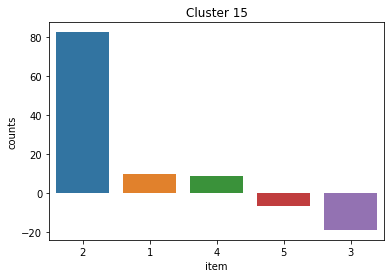

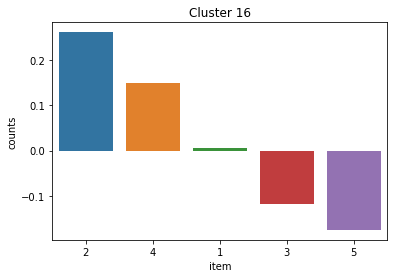

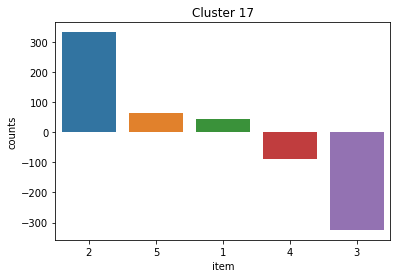

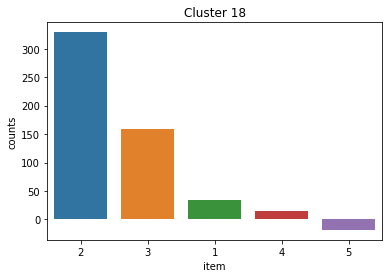

In [132]:
for n in range(18):
    pcDict = {'item':['1','2','3','4','5'],'counts':bestCluster.cluster_centers_[n,:]}
    df = pd.DataFrame(pcDict,columns=['item','counts'])

    tups = zip(['1','2','3','4','5'],bestCluster.cluster_centers_[n,:])
    order = []
    for s,p in sorted(tups,key=lambda x:x[1],reverse=True):
        order.append(s)

    f, ax = plt.subplots()
    ax = sns.barplot(x='item',y='counts',data=df,order=order)
    ax.set(title='Cluster {0}'.format(n+1))
#     sns.despine(left=True, bottom=True)
    
# plt.figure(figsize=(16,16))
# plt.barh(ocean.columns[14:-1],bestCluster.cluster_centers_[0,:],order=order)
# plt.gca().invert_yaxis()

In [129]:
order

['2', '3', '1', '4', '5']

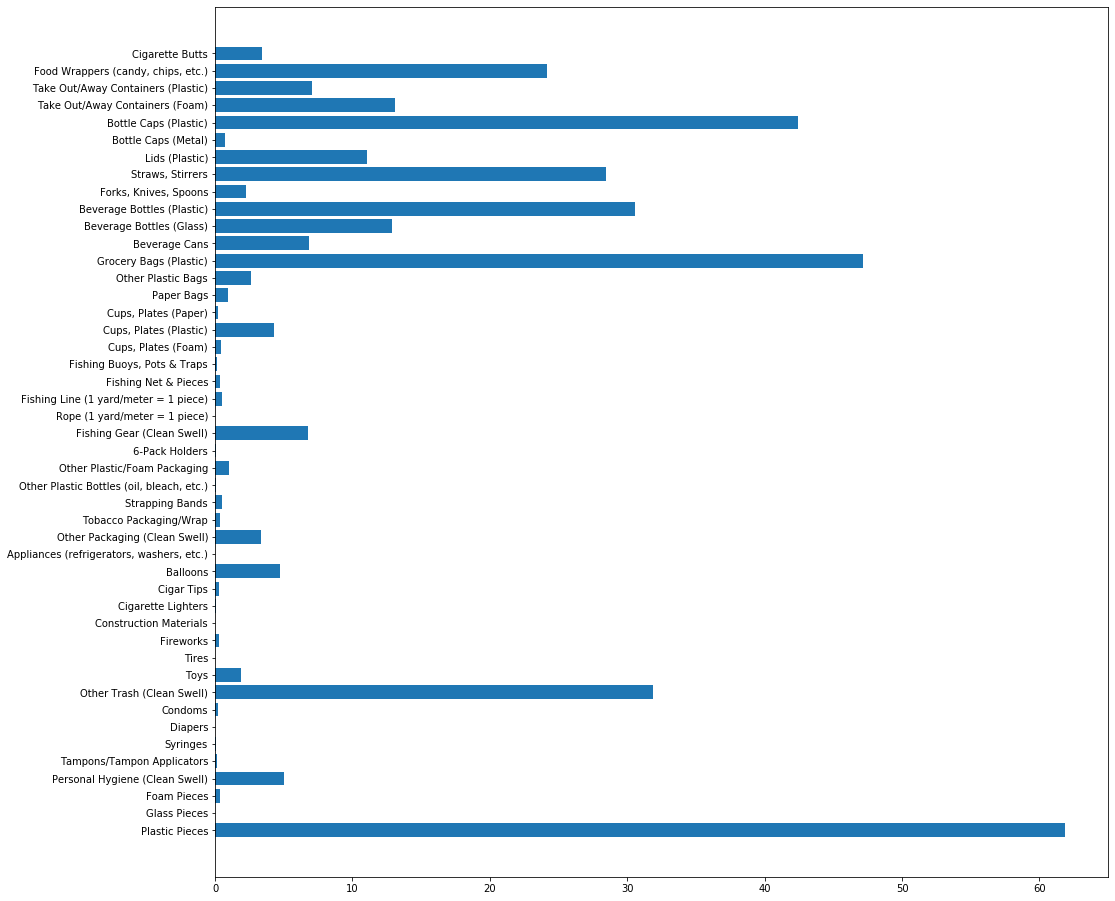

In [61]:
plt.figure(figsize=(16,16))
plt.barh(ocean.columns[14:-1],km.cluster_centers_[2,:])
plt.gca().invert_yaxis()

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer().fit_transform(items_df)

In [177]:
tfid.shape
items_df.shape

(37901, 46)

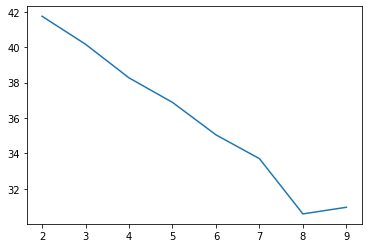

In [185]:
mini = float('inf')
bestCluster = None

ks = range(2,10)
inertias = []

for n in ks:
    km = MiniBatchKMeans(n).fit(tfid)
    inertias.append(km.inertia_)
    if km.inertia_ < mini:
        mini = km.inertia_
        bestCluster = km
        
plt.plot(ks,inertias)

In [175]:
clustersize = []
for cluster in range(18):
    clustersize.append(sum(km.labels_==cluster))
clustersize

[24, 3, 3, 6, 4, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [207]:
pop = pd.read_csv('pop_est_2019.tsv',sep='\t')
pop = pop.to_numpy()

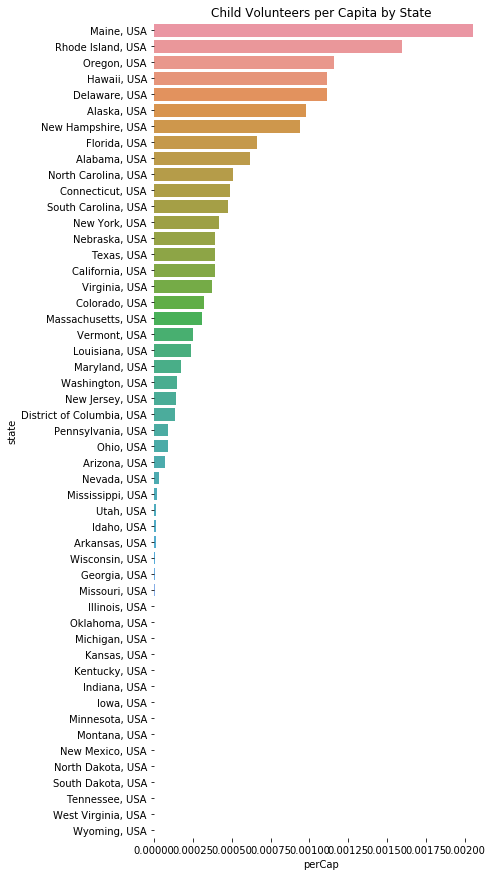

In [209]:
perCap = []
for i in range(0,len(children)):
    perCap.append(int(children[i])/int(pop[i][1]))

# plt.figure(figsize=(8, 16))
# plt.title('Volunteers per Capita by State')
# plt.barh(k,perCap)

pcDict = {'state':states,'perCap':perCap}

tups = zip(states,perCap)
order = []
for s,p in sorted(tups,key=lambda x:x[1],reverse=True):
    order.append(s)

df = pd.DataFrame(pcDict,columns=['state','perCap'])
# df.sort_values('perCap').reset_index(drop=True)

f, ax = plt.subplots(figsize=(6, 15))

ax = sns.barplot(x='perCap',y='state',data=df,order=order)
ax.set_xlabel('perCap')
ax.set(title='Child Volunteers per Capita by State')
sns.despine(left=True, bottom=True)

In [215]:
groupSize = dict()
groupSize['1-5'] = [0,0,0]
groupSize['6-10'] = [0,0,0]
groupSize['11-50'] = [0,0,0]
groupSize['51-200'] = [0,0,0]
groupSize['201-1000'] = [0,0,0]
groupSize['>1000'] = [0,0,0]

for index, row in ocean.iterrows():
    if row['People'] in range(1,6):
        groupSize['1-5'][0] += row['People']
        groupSize['1-5'][1] += row['Pounds']
        groupSize['1-5'][2] += 1
    elif row['People'] in range(6,11):
        groupSize['6-10'][0] += row['People']
        groupSize['6-10'][1] += row['Pounds']
        groupSize['6-10'][2] += 1
    elif row['People'] in range(11,51):
        groupSize['11-50'][0] += row['People']
        groupSize['11-50'][1] += row['Pounds']
        groupSize['11-50'][2] += 1
    elif row['People'] in range(51,201):
        groupSize['51-200'][0] += row['People']
        groupSize['51-200'][1] += row['Pounds']
        groupSize['51-200'][2] += 1
    elif row['People'] in range(201,1001):
        groupSize['201-1000'][0] += row['People']
        groupSize['201-1000'][1] += row['Pounds']
        groupSize['201-1000'][2] += 1
    elif row['People'] > 1000:
        groupSize['>1000'][0] += row['People']
        groupSize['>1000'][1] += row['Pounds']
        groupSize['>1000'][2] += 1

In [223]:
groups = list()
groupPeople = list()
groupPounds = list()
groupActivities = list()

for key,value in groupSize.items():
    groups.append(key)
    groupPeople.append(value[0])
    groupPounds.append(value[1])
    groupActivities.append(value[2])

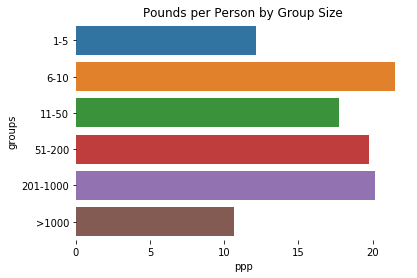

In [258]:
ppp = list()

for i in range(0,len(groupPeople)):
    ppp.append(int(groupPounds[i])/int(groupPeople[i]))

gp = {'groups':groups,'ppp':ppp}

# tups = zip(groups,ppp)
# order = []
# for s,p in sorted(tups,key=lambda x:x[1],reverse=True):
#     order.append(s)
    
df = pd.DataFrame(gp,columns=['groups','ppp'])

# # plt.barh(groups,ppp)

f, ax = plt.subplots()
ax = sns.barplot(x='ppp',y='groups',data=df)
ax.set_xlabel('ppp')
ax.set(title='Pounds per Person by Group Size')
sns.despine(left=True, bottom=True)

In [266]:
types = set()

for index, row in ocean.iterrows():
    if type(row['Cleanup Type']) == str:
        types.add(row['Cleanup Type'])

list(types)

['Underwater',
 'Land (beach, shoreline and inland)',
 'Watercraft (powerboat, sailboat, kayak or canoe)']

In [271]:
types = list()
type_pounds = list()
type_miles = list()
type_people = list()
type_activities = list()
type_ppp = list()
type_ppm = list()
type_ppa = list()
type_children = list()

for key,value in typeStats_sorted:
    types.append(key)
    type_pounds.append(value[0])
    type_miles.append(value[1])
    type_people.append(value[2])
    type_ppp.append(value[0]/value[2])
    type_ppm.append(value[0]/value[1])
    type_ppa.append(value[0]/value[3])
    type_activities.append(value[3])
    type_children.append(value[4])

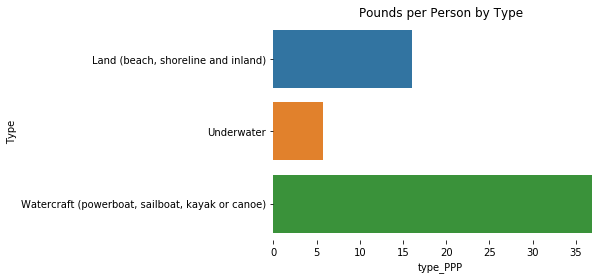

In [275]:
type_poundsPerPerson = list()
for i in range(0,len(type_pounds)):
    type_poundsPerPerson.append(type_pounds[i]/type_people[i])

tp = {'Type':types,'type_PPP':type_poundsPerPerson}

df = pd.DataFrame(tp,columns=['Type','type_PPP'])

f, ax = plt.subplots()

ax = sns.barplot(x='type_PPP',y='Type',data=df)
ax.set(title='Pounds per Person by Type')
sns.despine(left=True, bottom=True)